### Google automl의 Efficientdet 다운로드 및 설치
* 과거 efficientdet package는 tensorflow용 구현 모듈과 tf.keras용 구현 모듈이 별도로 구성되었으나 2021년 10월 27일 기준으로 tf2 디렉토리로 통일됨. 
* 따라서 강의 영상에서는 기존 keras를 삭제한다고 되어 있으나 이는 더 이상 필요가 없음. 
* 기존 강의 영상에서 from keras 로 되어 있는 부분을 from tf2 로 변경함. 

In [ ]:
!git clone --depth 1 https://github.com/google/automl

fatal: destination path 'automl' already exists and is not an empty directory.


In [ ]:
!cd /content/automl/efficientdet; pip install -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-1g_knzdj
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-1g_knzdj
     |████████████████████████████████| 6.4 MB 9.1 MB/s 
     |████████████████████████████████| 596 kB 76.0 MB/s 
     |████████████████████████████████| 1.1 MB 66.1 MB/s 
     |████████████████████████████████| 120 kB 76.4 MB/s 
     |████████████████████████████████| 462 kB 89.8 MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264353 sha256=34c67c80d09be119b116dfb653104ab0d88f21d1c2d948d8ee79bdc25611f1cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-z4rgarbp/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: pycocotools
    Found exi

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
!nvidia-smi

Sat Mar 12 10:54:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### efficientdet 수행을 위한 Library path 설정. 
* efficientdet을 setup을 하지 않고, 소스코드를 sys.path.append('/content/automl/efficientdet')로 library path 설정. 

In [ ]:
import os
import sys
import tensorflow.compat.v1 as tf

In [ ]:
sys.path.append('/content/automl/efficientdet')

In [ ]:
sys.path.append('/content')

In [ ]:
!ls -lia /usr/local/lib/python3.7/dist-packages/

total 36176
3686412 drwxrwsr-x  1 root staff     4096 Mar 12 10:54 .
3686411 drwxrwsr-x  1 root staff     4096 Mar  9 14:28 ..
3952094 drwxr-sr-x  6 root staff     4096 Mar 10 14:17 absl
3952150 drwxr-sr-x  2 root staff     4096 Mar 10 14:17 absl_py-1.0.0.dist-info
3952159 drwxr-sr-x  4 root staff     4096 Mar 10 14:12 alabaster
3952176 drwxr-sr-x  2 root staff     4096 Mar 10 14:12 alabaster-0.7.12.dist-info
3952186 drwxr-sr-x  8 root staff     4096 Mar 10 14:12 albumentations
3952228 drwxr-sr-x  2 root staff     4096 Mar 10 14:12 albumentations-0.1.12.dist-info
3952236 drwxr-sr-x 10 root staff     4096 Mar 10 14:21 altair
3952779 drwxr-sr-x  2 root staff     4096 Mar 10 14:21 altair-4.2.0.dist-info
3952787 drwxr-sr-x  3 root staff     4096 Mar 10 14:19 apiclient
3952791 drwxr-sr-x  2 root staff     4096 Mar 10 14:17 appdirs-1.4.4.dist-info
3814595 -rw-r--r--  1 root staff    24720 Mar 10 14:17 appdirs.py
4203172 drwxr-sr-x  4 root staff     4096 Mar  9 14:41 apt
4203196 -rwxr-xr-x  1

In [ ]:
# /content/automl/efficient 으로 library path가 정상적으로 잡히면 아래 모듈 import가 되어야함. 
import hparams_config

# 강의영상에는 from keras import anchors 이지만 efficientdet 패키지의 keras 모듈이 tf2 로 변경됨. 
from tf2 import anchors
from model_inspect import ModelInspector

### COCO 데이터로 Pretrained된 efficientdet-d0 모델을 다운로드

In [ ]:
# 이 사이트에서 h5는 케라스로 pretrained된 것
https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco2/efficientdet-d0.tar.gz

In [ ]:
MODEL = 'efficientdet-d0' 

def download(m):
  if m not in os.listdir():
    !wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{m}.tar.gz
    !tar zxf {m}.tar.gz
  ckpt_path = os.path.join(os.getcwd(), m)
  return ckpt_path

# Download checkpoint.
ckpt_path = download(MODEL)
print('Use model in {}'.format(ckpt_path))

--2022-03-12 11:02:29--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d0.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.135.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28994253 (28M) [application/octet-stream]
Saving to: ‘efficientdet-d0.tar.gz’

efficientdet-d0.tar 100%[===================>]  27.65M  69.8MB/s    in 0.4s    

2022-03-12 11:02:30 (69.8 MB/s) - ‘efficientdet-d0.tar.gz’ saved [28994253/28994253]

Use model in /content/efficientdet-d0


In [ ]:
!mkdir ./data
!wget -O ./data/img01.png https://user-images.githubusercontent.com/11736571/77320690-099af300-6d37-11ea-9d86-24f14dc2d540.png

--2022-03-12 11:03:33--  https://user-images.githubusercontent.com/11736571/77320690-099af300-6d37-11ea-9d86-24f14dc2d540.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4080549 (3.9M) [image/png]
Saving to: ‘./data/img01.png’

./data/img01.png    100%[===================>]   3.89M  --.-KB/s    in 0.04s   

2022-03-12 11:03:34 (103 MB/s) - ‘./data/img01.png’ saved [4080549/4080549]



(1080, 1920, 3)


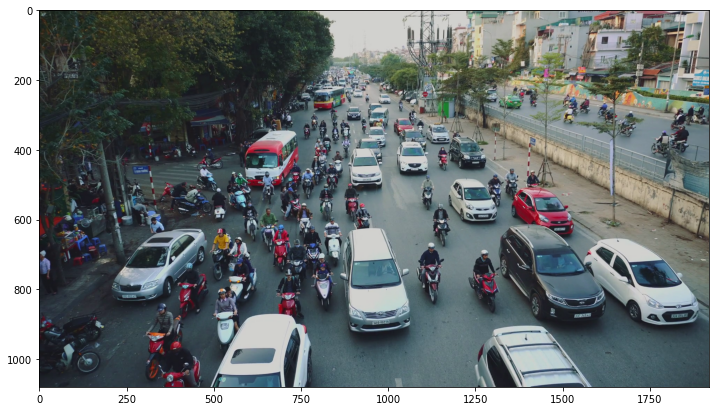

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_array = cv2.cvtColor(cv2.imread('/content/data/img01.png'), cv2.COLOR_BGR2RGB)
print(image_array.shape)

plt.figure(figsize=(12, 12))
plt.imshow(image_array)

### Pretrained efficientdet 모델로 Inference 를 수행하기 위한 환경 설정
* hparams_config.Config 객체를 통해 모델 환경 설정. 

In [ ]:
class INFER_CFG:
  model_name = 'efficientdet-d0' # efficientdet 모델명
  model_dir = '/content/efficientdet-d0' # pretrained checkpoint 파일이 있는 디렉토리
  hparams = '' # csv 형식의 k=v 쌍 또는 yaml file 

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf

import hparams_config
import inference

# 강의 영상에는 from keras import anchors 이지만 efficientdet 패키지의 keras 모듈이 tf2 로 변경됨. 
from tf2 import efficientdet_keras

**hparams_config.Config 객체**    
- 모델을 구성하는 config
- model자체에 대한 configuration도 있을 뿐더러 학습을 위한, 다양한 (모델, 학습 등등 파라미터 다 들어가있음)

In [ ]:
#efficientdet-d0의 기본 config 확인. 
config = hparams_config.get_efficientdet_config(INFER_CFG.model_name)
print('config type:', type(config))
print(config)

config type: <class 'hparams_config.Config'>
act_type: swish
alpha: 0.25
anchor_scale: 4.0
apply_bn_for_resampling: true
aspect_ratios:
- 1.0
- 2.0
- 0.5
autoaugment_policy: null
backbone_config: null
backbone_name: efficientnet-b0
box_class_repeats: 3
box_loss_weight: 50.0
ckpt_var_scope: null
clip_gradients_norm: 10.0
conv_after_downsample: false
conv_bn_act_pattern: false
data_format: channels_last
dataset_type: null
delta: 0.1
drop_remainder: true
first_lr_drop_epoch: 200.0
fpn_cell_repeats: 3
fpn_config: null
fpn_name: null
fpn_num_filters: 64
fpn_weight_method: null
gamma: 1.5
grad_checkpoint: false
grid_mask: false
heads:
- object_detection
image_size: 512
img_summary_steps: null
input_rand_hflip: true
iou_loss_type: null
iou_loss_weight: 1.0
is_training_bn: true
jitter_max: 2.0
jitter_min: 0.1
label_map: null
label_smoothing: 0.0
learning_rate: 0.08
loss_scale: null
lr_decay_method: cosine
lr_warmup_epoch: 1.0
lr_warmup_init: 0.008
map_freq: 5
max_instances_per_image: 100
max_l

In [ ]:
# 추가적으로 override해야 하는 부분
# config의 특정 항목을 update

config.is_training_bn = False  # 학습할 때 batch normalization을 어떻게 할거냐 -> 학습이 아니라 inference니깐 false로 하겠다.
#config.image_size = '1920x1280'

config.nms_configs.score_thresh = 0.4
config.nms_configs.max_output_size = 100

config.override(INFER_CFG.hparams)

In [ ]:
# P100 GPU Card에서는 아래 수행하지 말것. V100 GPU 시에는 mixed_float16으로 mixed_precision 설정. 

#policy = tf.keras.mixed_precision.Policy('mixed_float16')
#tf.keras.mixed_precision.set_global_policy(policy)
#tf.keras.mixed_precision.set_global_policy('mixed_float16')
#tf.config.run_functions_eagerly(MODEL_CONFIG.debug)

### Pretrained 모델 생성 후 Inference 수행
* Pretrained 모델을 메모리에 올려서 생성
* config인자로 하여 EfficientDetModel생성  
* 만들어진 모델에 다운로드 된 Pretrained Weight 파일의 weight값을 model.load_weights()로 입력  

In [ ]:
INFER_CFG.model_dir

'/content/efficientdet-d0'

In [ ]:
import inference

# 강의영상에는 from keras import anchors 이지만 efficientdet 패키지의 keras 모듈이 tf2 로 변경됨. 
from tf2 import efficientdet_keras # github/automl/effeicientdet/tf2/ ..

model = efficientdet_keras.EfficientDetModel(config=config) # config 설정에 따라 네트워크 모델을 만들어라 --> 반환 : 비어있는 네트워크 모델
model.build((None, None, None, 3)) # 이미지개수, height, width , channel
print('#### checkpoint name:', tf.train.latest_checkpoint(INFER_CFG.model_dir))
model.load_weights(tf.train.latest_checkpoint(INFER_CFG.model_dir))
model.summary()

/content/automl/efficientdet/utils.py:23: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  from tensorflow.python.tpu import tpu_function  # pylint:disable=g-direct-tensorflow-import
/content/automl/efficientdet/utils.py:255: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  for u in self.updates:


#### checkpoint name: /content/efficientdet-d0/model
Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Model)     multiple                  3634844   
                                                                 
 resample_p6 (ResampleFeatur  multiple                 20800     
 eMap)                                                           
                                                                 
 resample_p7 (ResampleFeatur  multiple                 0         
 eMap)                                                           
                                                                 
 fpn_cells (FPNCells)        multiple                  179321    
                                                                 
 class_net (ClassNet)        multiple                  71274     
                                                                 
 box_net (BoxNet)            multiple                  20964     


In [ ]:
from PIL import Image
import cv2

# image는 4차원 array, Tensor 모두 가능.  
imgs = [np.array(Image.open('/content/data/img01.png'))] # [] :1차원 / 이미지 형태 : 3차원 --> 1+3 = 4
imgs = tf.convert_to_tensor(imgs, dtype=tf.uint8)  # 4차원 텐서 만들어짐

### 아래와 같이 numpy array도 모델에 입력되는 이미지 값으로 가능. 
''' 
img = cv2.cvtColor(cv2.imread('/content/data/img01.png'), cv2.COLOR_BGR2RGB)
imgs= img[np.newaxis, ...]
boxes, scores, classes, valid_len = model(imgs, training=False, post_mode='global')
'''
print()

In [ ]:
import time

# Inference 수행하고 수행 시간을 측정. 
start_time = time.time()

# all tensor type
boxes, scores, classes, valid_len = model(imgs, training=False, post_mode='global')
print('elapsed time:', time.time() - start_time)

/content/automl/efficientdet/utils.py:255: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  for u in self.updates:


elapsed time: 0.2237379550933838


### Inference 반환 결과 살펴보고 API로 시각화 하기
* inference model에 image tensor를 입력하여 반환된 결과는 모두 tensor이며, bounding box의 좌표, confidence score, class id 값, valid한 갯수가 반환됨. 
* config에 max_instances_per_image이 100으로 설정되었으므로 기본적으로 inference결과는 100개의 object들의 Detection 결과를 가지게 됨. 
* 이들 중 valid한 갯수(valid_len)은 이들중 의미있는 object detection 갯수를 의미함.(0 부터 valid_len-1 까지의 index를 가진 array결과가 의미있는 detection 결과임)
* inference.visualize_image()로 반화 결과를 입력하여 시각화 적용

In [ ]:
# (1,100,4) //  1: 1개의 img / 100 : 100개의 obj / 4 : obj에 대한 4개 좌푯값
# efficientdet lite 모델 , ""automl efficientdet으로 구현이 된 라이트 모델"" 같은 경우는 ""원본 이미지 좌표값(실수형)으로 반환이 됨""
# valid_len :: obj detect를 100으로 설정해서 obj가 100가 안되더라도 100개 숫자를 맞춰서 detect를 수행함. --> 거기서 detect한 의미있는 obj의 개수 
# --> valid_len이 13개면 13개 제외 나머지는 다 같은 좌푯값으로 채워버림 , obj가 13개 있다는 의미는 아님(confidence score를 기준으로 봤을 때 의미있는게 13개다.)

boxes

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[ 898.7691   , 1250.5381   , 1078.944    , 1593.3597   ],
        [ 485.65506  , 1178.6895   ,  613.1528   , 1317.9205   ],
        [ 620.43     , 1313.1946   ,  905.7822   , 1625.1598   ],
        [ 870.51105  ,  490.04422  , 1078.4515   ,  778.78973  ],
        [ 505.97702  , 1356.5035   ,  636.8839   , 1533.2777   ],
        [ 628.0882   ,  211.97603  ,  842.73444  ,  485.74365  ],
        [ 648.43634  , 1553.6306   ,  911.2138   , 1901.6282   ],
        [ 875.3994   ,    3.3257744, 1039.7441   ,  182.6283   ],
        [ 925.4872   ,  301.891    , 1075.1144   ,  460.3118   ],
        [ 619.0373   ,  873.7107   ,  927.9857   , 1069.7871   ],
        [ 351.75015  ,  582.6734   ,  511.3894   ,  738.4224   ],
        [ 690.2022   , 1238.6897   ,  860.37756  , 1316.6832   ],
        [ 677.63     , 1087.3639   ,  835.46027  , 1159.2014   ],
        [ 677.3428   , 1864.1046   ,  759.2194   , 1864.1046   ],
        [ 677.3428   , 

In [ ]:
print(valid_len.numpy()) # valid_len에 값이 13개 들어가 있음
boxes.shape, scores.shape, classes.shape

[13]


(TensorShape([1, 100, 4]), TensorShape([1, 100]), TensorShape([1, 100]))

In [ ]:
scores # 0이 아닌 값이 13개 들어가 있음.  obj가 13개 있다는 의미는 아님. (filtering[config에서 확인 가능]해서 종합적으로 판단한 유의미한 obj 개수가 13개라는 뜻 )

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.8457936 , 0.69785595, 0.68892914, 0.68421674, 0.6794203 ,
        0.6492445 , 0.6139568 , 0.4841449 , 0.44828248, 0.43981278,
        0.41531554, 0.41527748, 0.41297284, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        

In [ ]:
# 열 개씩 뽑기
# 매칭됨

print('##bboxes:', boxes[0, :10], '\n##scores:', scores[0, :10], '\n##classes:', classes[0, :10])

##bboxes: tf.Tensor(
[[ 898.7691    1250.5381    1078.944     1593.3597   ]
 [ 485.65506   1178.6895     613.1528    1317.9205   ]
 [ 620.43      1313.1946     905.7822    1625.1598   ]
 [ 870.51105    490.04422   1078.4515     778.78973  ]
 [ 505.97702   1356.5035     636.8839    1533.2777   ]
 [ 628.0882     211.97603    842.73444    485.74365  ]
 [ 648.43634   1553.6306     911.2138    1901.6282   ]
 [ 875.3994       3.3257744 1039.7441     182.6283   ]
 [ 925.4872     301.891     1075.1144     460.3118   ]
 [ 619.0373     873.7107     927.9857    1069.7871   ]], shape=(10, 4), dtype=float32) 
##scores: tf.Tensor(
[0.8457936  0.69785595 0.68892914 0.68421674 0.6794203  0.6492445
 0.6139568  0.4841449  0.44828248 0.43981278], shape=(10,), dtype=float32) 
##classes: tf.Tensor([3. 3. 3. 3. 3. 3. 3. 4. 4. 3.], shape=(10,), dtype=float32)


In [ ]:
!mkdir -p /content/data_output

In [ ]:
for i, img in enumerate(imgs):
  length = valid_len[i]
  
  img = inference.visualize_image(
      img,
      boxes[i].numpy()[:length],
      classes[i].numpy().astype(np.int)[:length],
      scores[i].numpy()[:length],
      label_map=config.label_map,
      min_score_thresh=config.nms_configs.score_thresh,
      max_boxes_to_draw=config.nms_configs.max_output_size)
  
  output_image_path = os.path.join('/content/data_output', str(i) + '.jpg')
  Image.fromarray(img).save(output_image_path)
  print('writing annotated image to %s' % output_image_path)

writing annotated image to /content/data_output/0.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


Static Graph mode (Non eager mode)
- tf1에서 모델이 그래프처럼 다 만들어지기 전까지는 디버깅 불가    

### Static Graph mode(Non eager mode)로 Inference 수행 성능 향상 시키기
* eager mode로 default로 하고 있음

* @tf.function을 이용하여(@tf.function으로 static graph mode로 돌아가라고 명시 == Non eager mode, 이 모드로 하면 수행 속도가 훨씬 빨라짐) static mode로 inference를 수행할 수 있도록 ExportModel 클래스 생성
* inference 수행 시 ExportModel의 @tf.function이 적용된 메소드를 호출할 수 있도록 함. 

In [34]:
import time

class ExportModel(tf.Module): 

# 생성자는 앞에서 만든 모델 집어넣음
  def __init__(self, model):
    super().__init__()
    self.model = model

# 
  @tf.function 
  def f(self, imgs): # 여기서 f 함수는 ExportModel Class의 함수
    #model(imgs, training=False, post_mode='global')
    return self.model(imgs, training=False, post_mode='global')

# 객체 생성
export_model = ExportModel(model)

In [36]:
# p100에서 image 1920x1280일 경우 74ms, v100에서 image 512x512일 경우 24ms

start_time = time.time()
boxes, scores, classes, valid_len = export_model.f(imgs) # Non Eager Mode , STatic Graph Execution

print('elapsed time:', time.time() - start_time)

elapsed time: 0.02236175537109375


### 시각화 함수 생성하고 inference 결과를 시각화

In [37]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [38]:
def get_detected_img(export_model, img_array, is_print=True):   
  # automl efficent은 반환 bbox 좌표값이 원본 이미지 좌표값으로 되어 있으므로 별도의 scaling작업 필요 없음. 
  '''
  height = img_array.shape[0]
  width = img_array.shape[1]
  '''
  # cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
  draw_img = img_array.copy()

  # bounding box의 테두리와 caption 글자색 지정
  green_color=(0, 255, 0)
  red_color=(0, 0, 255)

  # cv2로 만들어진 numpy image array를 tensor로 변환
  img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]
  #img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)[tf.newaxis, ...]

  # efficientdet 모델을 다운로드 한 뒤 inference 수행. 
  start_time = time.time()

  # automl efficientdet 모델은 boxes, score, classes, num_detections를 각각 Tensor로 반환. 
  # 여기서 hparams config 내부에서 filtering이 되어버렸기 때문에 함수 인자로 threshold 같은 인자 설정 비권유
  boxes, scores, classes, valid_len = export_model.f(img_tensor)

  # Tensor값을 시각화를 위해 numpy 로 변환. 
  boxes = boxes.numpy()
  scores = scores.numpy()
  classes = classes.numpy()
  valid_len = valid_len.numpy()
  
  # detected 된 object들을 iteration 하면서 정보 추출. detect된 object의 갯수는 100개
  for i in range(valid_len[0]):

    # detection score를 iteration시 마다 높은 순으로 추출하고 SCORE_THRESHOLD보다 낮으면 loop 중단. 
    score = scores[0, i]
    
    # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
    box = boxes[0, i]

    ''' **** 주의 ******
    box는 ymin, xmin, ymax, xmax 순서로 되어 있음. 또한 원본 좌표값으로 되어 있음. '''
    left = box[1]
    top = box[0] 
    right = box[3] 
    bottom = box[2] 

    # class id 추출하고 class 명으로 매핑
    class_id = classes[0, i]
    caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
    print(caption)
    #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
    cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

  if is_print:
    print('Detection 수행시간:',round(time.time() - start_time, 2),"초")

  return draw_img

car: 0.8458
car: 0.6979
car: 0.6889
car: 0.6842
car: 0.6794
car: 0.6492
car: 0.6140
motorcycle: 0.4841
motorcycle: 0.4483
car: 0.4398
bus: 0.4153
person: 0.4153
motorcycle: 0.4130
Detection 수행시간: 0.04 초


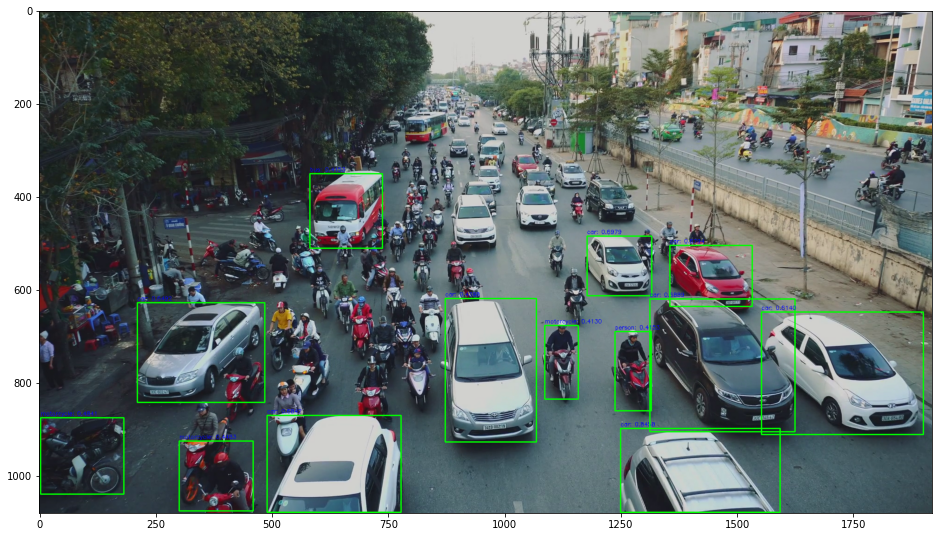

In [39]:
# 결과는 비슷하지만 Static Graph Mode (Non Eager Mode)로 수행 속도 향상
import cv2
img_array = cv2.cvtColor(cv2.imread('/content/data/img01.png'), cv2.COLOR_BGR2RGB)

draw_img = get_detected_img(export_model, img_array, is_print=True)
plt.figure(figsize=(16, 16))
plt.imshow(draw_img)

In [40]:
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2022-03-12 13:37:36--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2022-03-12 13:37:37 (17.1 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]

--2022-03-12 13:37:37--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7627

(633, 806, 3)
person: 0.9486
person: 0.9406
person: 0.9362
person: 0.8914
car: 0.6025
car: 0.5251
Detection 수행시간: 0.02 초


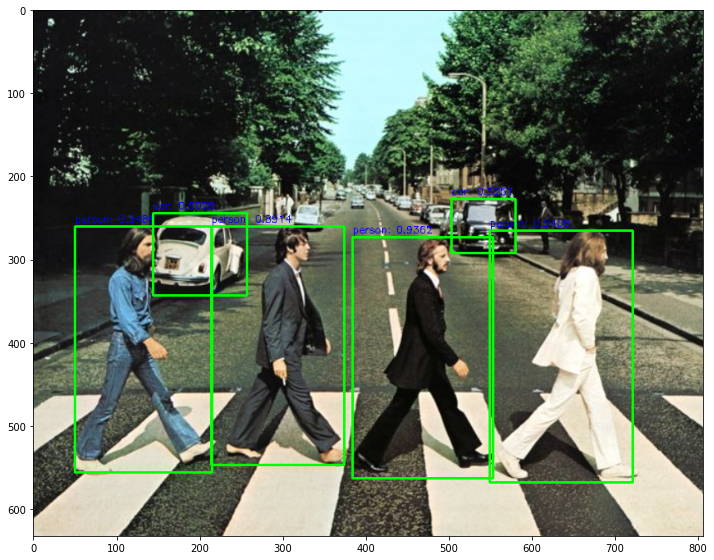

In [44]:
import cv2
img_array = cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'), cv2.COLOR_BGR2RGB)
print(img_array.shape)

draw_img = get_detected_img(export_model, img_array, is_print=True)
plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

EfficientD0은 **이미지의 사이즈가 커서(선명한 이미지) obj의 크기가 큰 걸로** inference하는게 성능 향상이 있을 것 같다 

### pretrained된 last checkpoint 모델의 weight를 다시 load_weight() 적용시 런타임 재시작을 적용해야 함.
* 이를 위해 앞의 로직을 아래 셀에서 모두 일괄 정리함 
* 이미지 사이즈 변경을 하고 다시 inference 수행

In [1]:
import os
import sys
import tensorflow.compat.v1 as tf
import numpy as np

sys.path.append('/content/automl/efficientdet')

import hparams_config

# 강의영상에는 from keras import anchors 이지만 efficientdet 패키지의 keras 모듈이 tf2 로 변경됨. 
from tf2 import anchors
from model_inspect import ModelInspector

class INFER_CFG:
  model_name = 'efficientdet-d0' # efficientdet 모델명
  model_dir = '/content/efficientdet-d0' # pretrained checkpoint 파일이 있는 디렉토리
  hparams = '' # csv 형식의 k=v 쌍 또는 yaml file

config = hparams_config.get_efficientdet_config(INFER_CFG.model_name)
config.is_training_bn = False

# ★ 앞 부분에서 이 부분만 변경됨 (이미지 사이즈 변경)
# config의 image_size를 원본 이미지 사이즈로 재 조정. config의 image_size에 가로x세로 형식으로 문자열 입력 
config.image_size = '1920x1280'
config.nms_configs.score_thresh = 0.4
config.nms_configs.max_output_size = 100
config.override(INFER_CFG.hparams)

import inference
from tf2 import efficientdet_keras

model = efficientdet_keras.EfficientDetModel(config=config)
model.build((None, None, None, 3))
print('#### checkpoint name:', tf.train.latest_checkpoint(INFER_CFG.model_dir))

# pretrained된 last checkpoint 모델의 weight를 다시 load_weight() 적용시 런타임 재시작을 적용해야 함. 
model.load_weights(tf.train.latest_checkpoint(INFER_CFG.model_dir))
model.summary()

class ExportModel(tf.Module):

  def __init__(self, model):
    super().__init__()
    self.model = model

  @tf.function
  def f(self, imgs):
    return self.model(imgs, training=False, post_mode='global')

export_model = ExportModel(model)

/content/automl/efficientdet/utils.py:23: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  from tensorflow.python.tpu import tpu_function  # pylint:disable=g-direct-tensorflow-import
/content/automl/efficientdet/utils.py:255: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  for u in self.updates:


#### checkpoint name: /content/efficientdet-d0/model
Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Model)     multiple                  3634844   
                                                                 
 resample_p6 (ResampleFeatur  multiple                 20800     
 eMap)                                                           
                                                                 
 resample_p7 (ResampleFeatur  multiple                 0         
 eMap)                                                           
                                                                 
 fpn_cells (FPNCells)        multiple                  179321    
                                                                 
 class_net (ClassNet)        multiple                  71274     
                                                                 
 box_net (BoxNet)            multiple                  20964     


In [4]:
# p100에서 image 1920x1280일 경우 74ms, image 512x512일 경우 27ms, v100에서 image 512x512일 경우 24ms
import time
import cv2 

img = cv2.cvtColor(cv2.imread('/content/data/img01.png'), cv2.COLOR_BGR2RGB)
imgs= img[np.newaxis, ...]

start_time = time.time()
boxes, scores, classes, valid_len = export_model.f(imgs)

print('elapsed time:', time.time() - start_time)

elapsed time: 0.08202147483825684


In [5]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [6]:
def get_detected_img(export_model, img_array, is_print=True):   
  # automl efficent은 반환 bbox 좌표값이 원본 이미지 좌표값으로 되어 있으므로 별도의 scaling작업 필요 없음. 
  '''
  height = img_array.shape[0]
  width = img_array.shape[1]
  '''
  # cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
  draw_img = img_array.copy()

  # bounding box의 테두리와 caption 글자색 지정
  green_color=(0, 255, 0)
  red_color=(0, 0, 255)

  # cv2로 만들어진 numpy image array를 tensor로 변환
  img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]
  #img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)[tf.newaxis, ...]

  # efficientdet 모델을 다운로드 한 뒤 inference 수행. 
  start_time = time.time()

  # automl efficientdet 모델은 boxes, score, classes, num_detections를 각각 Tensor로 반환. 
  boxes, scores, classes, valid_len = export_model.f(img_tensor)
  
  # Tensor값을 시각화를 위해 numpy 로 변환. 
  boxes = boxes.numpy()
  scores = scores.numpy()
  classes = classes.numpy()
  valid_len = valid_len.numpy()
  
  # detected 된 object들을 iteration 하면서 정보 추출. detect된 object의 갯수는 100개
  for i in range(valid_len[0]):

    # detection score를 iteration시 마다 높은 순으로 추출하고 SCORE_THRESHOLD보다 낮으면 loop 중단. 
    score = scores[0, i]
    
    # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
    box = boxes[0, i]

    ''' **** 주의 ******
    box는 ymin, xmin, ymax, xmax 순서로 되어 있음. 또한 원본 좌표값으로 되어 있음. '''
    left = box[1]
    top = box[0] 
    right = box[3] 
    bottom = box[2] 

    # class id 추출하고 class 명으로 매핑
    class_id = classes[0, i]
    caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
    print(caption)

    #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
    cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

  if is_print:
    print('Detection 수행시간:',round(time.time() - start_time, 2),"초")

  return draw_img

In [7]:
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2022-03-12 13:46:38--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2022-03-12 13:46:38 (17.1 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]

--2022-03-12 13:46:39--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7627

car: 0.9021
car: 0.8520
car: 0.8487
car: 0.8333
car: 0.8323
car: 0.8282
car: 0.8255
motorcycle: 0.8187
car: 0.8071
person: 0.7914
car: 0.7907
motorcycle: 0.7842
motorcycle: 0.7740
car: 0.7728
person: 0.7693
person: 0.7683
bus: 0.7670
person: 0.7566
person: 0.7547
person: 0.7471
person: 0.7445
car: 0.7234
person: 0.7191
motorcycle: 0.7107
person: 0.7092
person: 0.7058
person: 0.7020
person: 0.6909
car: 0.6864
motorcycle: 0.6836
person: 0.6831
person: 0.6801
motorcycle: 0.6746
person: 0.6733
bus: 0.6674
car: 0.6644
person: 0.6572
person: 0.6565
person: 0.6478
car: 0.6473
person: 0.6434
person: 0.6376
person: 0.6326
car: 0.6318
person: 0.6287
person: 0.6285
person: 0.6234
person: 0.6183
car: 0.6170
car: 0.6085
person: 0.6050
person: 0.6043
car: 0.6012
person: 0.5999
person: 0.5903
car: 0.5812
person: 0.5773
motorcycle: 0.5733
person: 0.5705
person: 0.5557
motorcycle: 0.5504
person: 0.5492
person: 0.5386
person: 0.5357
person: 0.5347
person: 0.5345
motorcycle: 0.5325
motorcycle: 0.5286
per

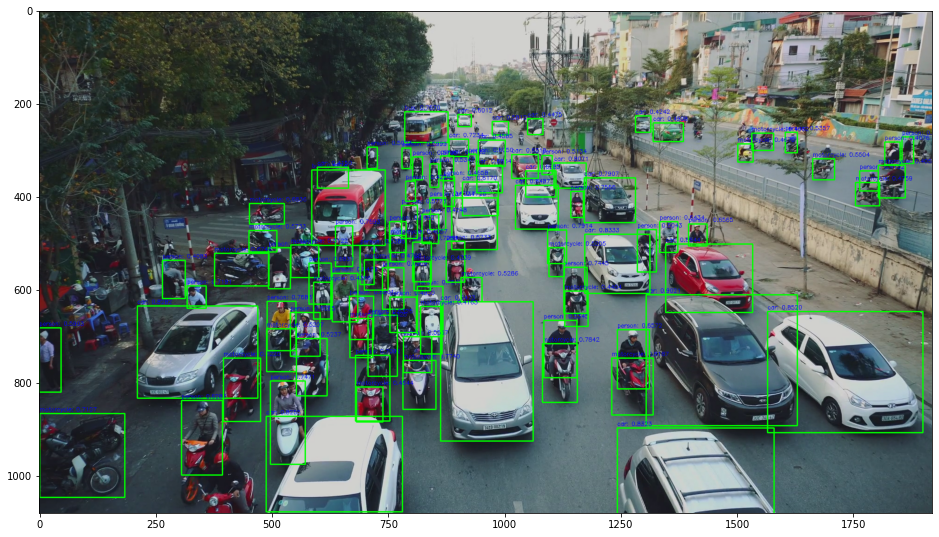

In [8]:
import cv2
import matplotlib.pyplot as plt

img_array = cv2.cvtColor(cv2.imread('/content/data/img01.png'), cv2.COLOR_BGR2RGB)

draw_img = get_detected_img(export_model, img_array, is_print=True)
plt.figure(figsize=(16, 16))
plt.imshow(draw_img)

In [15]:
%cd ./data
!ls -lia

[Errno 2] No such file or directory: './data'
/content/data
total 4448
5243140 drwxr-xr-x 2 root root    4096 Mar 12 13:37 .
3408686 drwxr-xr-x 1 root root    4096 Mar 12 12:00 ..
5243983 -rw-r--r-- 1 root root   76279 Mar 12 13:46 baseball01.jpg
5243982 -rw-r--r-- 1 root root  383118 Mar 12 13:46 beatles01.jpg
5243141 -rw-r--r-- 1 root root 4080549 Mar 23  2020 img01.png


/content/automl/efficientdet/utils.py:23: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  from tensorflow.python.tpu import tpu_function  # pylint:disable=g-direct-tensorflow-import
/content/automl/efficientdet/utils.py:255: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  for u in self.updates:


person: 0.9743
person: 0.9432
person: 0.9181
person: 0.8508
car: 0.7775
car: 0.7682
car: 0.7188
person: 0.7122
car: 0.7111
car: 0.6500
car: 0.6117
car: 0.5698
car: 0.5567
car: 0.5252
Detection 수행시간: 3.74 초


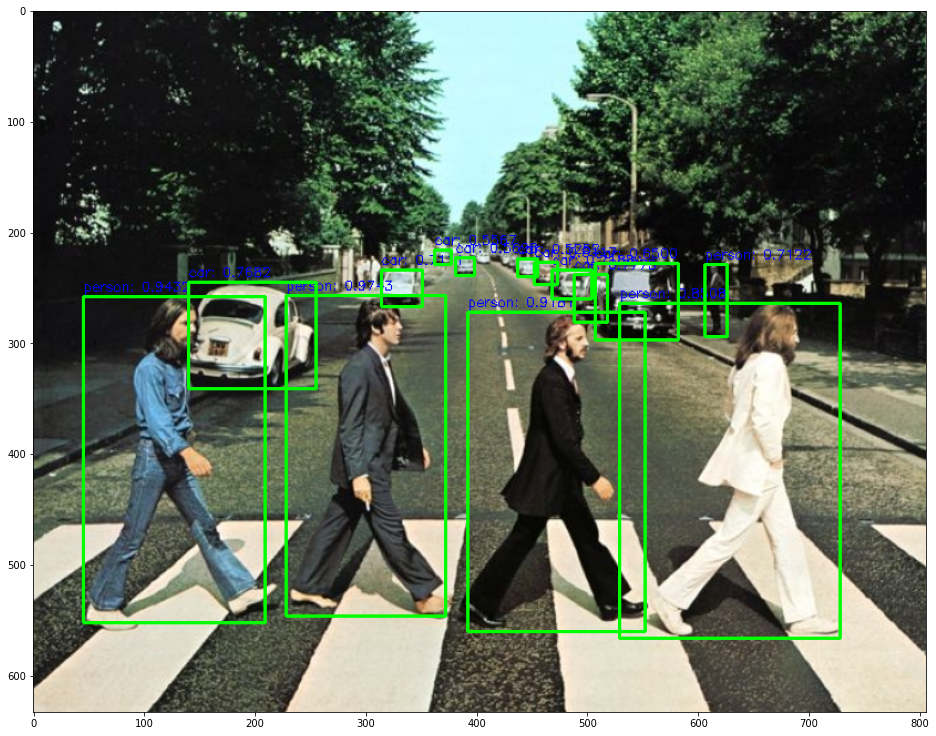

In [16]:
import cv2
import matplotlib.pyplot as plt

img_array = cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'), cv2.COLOR_BGR2RGB)

draw_img = get_detected_img(export_model, img_array, is_print=True)
plt.figure(figsize=(16, 16))
plt.imshow(draw_img)

Size를 키우고 D0로 할거냐 아니면 D2 정도해서 D2의 사이즈를 할거냐는 FPS를 보면서 조정

**유의해야 될 점**
- 작은 obj에 대해서 D0는 조금 detect하는 부분들이 스무스하게 안됨. 